In [1]:
%matplotlib inline

사용할 라이브러리를 불러옵니다.
import numpy as np                                     # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                                    # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt                        # 시각화 설정 클래스입니다.

from sklearn.ensemble import RandomForestClassifier    # 사용할 머신러닝 알고리즘입니다.
from sklearn.metrics import plot_confusion_matrix      # 모델 성능평가를 위한 함수입니다.


plt.rcParams['figure.figsize'] = [16, 8]

# 학습 데이터를 불러옵니다.
train = pd.read_csv('./train.csv', sep=',', encoding='utf-8')
x_train = train.drop(['target', 'species'], axis=1).values
y_train = train['species'].values

# 테스트 데이터를 불러옵니다.
test = pd.read_csv('./test.csv', sep=',', encoding='utf-8')
x_test = test.drop(['target', 'species'], axis=1).values
y_test = test['species'].values

# 사용할 알고리즘을 불러옵니다.
model = RandomForestClassifier(
    n_estimators=100,       # 랜덤포레스트를 구성할 의사결정나무의 수를 결정합니다.
    max_depth=None,         # 의사결정나무의 최대깊이를 결정합니다.
    n_jobs=-1               # 사용할 프로세서 수를 결정합니다.
)

# 학습 데이터로 모델을 학습합니다.
model.fit(x_train, y_train)

# 테스트 데이터로 예측합니다.
pred = model.predict(x_test)
test['prediction'] = pred

# 테스트 데이터로 정확성을 확인합니다.
print('Accuracy: ', model.score(x_test, y_test) * 100)

Accuracy:  100.0


<Figure size 432x288 with 0 Axes>

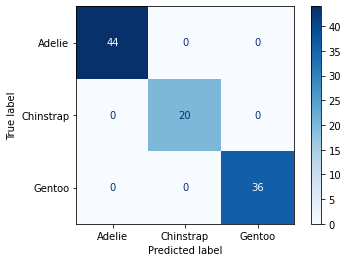

In [2]:
plt.figure()
plot_confusion_matrix(
    model,
    x_test,
    y_test,
    display_labels=['Adelie', 'Chinstrap', 'Gentoo'],
    cmap=plt.cm.Blues
)
plt.show()